# Analyse de la dist. du vocabulaire

### Imports

In [89]:
import nltk
nltk.download('stopwords') #liste pré-définie de stopwords
from nltk.corpus import stopwords #attention de bien nettoyer les stopwords !! sinon résultats bizarres

import os
import yake #(Yet Another Keyword Extractor) "that uses text statistical features to select the most important keywords from a document"

from collections import Counter
from wordcloud import WordCloud #besoin de compilateur c++ pour l'installer

from IPython.display import Image

import re #pour les expressions régulières afin de nettoyer l OCRisation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Gerer les stopwords

#### Créer une liste des stopwords

Wouldn't be terrible to add single letters back it, that was an overcorrection on my part (ie k, j, f, l, etc)

In [116]:
#jouer encore avec cela pour en ajouter des nouveaux en fonction du contexte, modifié de la liste de https://github.com/stopwords-iso/stopwords-fr?tab=readme-ov-file, à verifer sa fidelité
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "elles",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", ":", "même", "voir", "fois", "jour", "année", "ans", "faites", "le", "la", "de"]

# New stopwords to add
git_stopwords = [
    "a", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", "bigre", "bon", "boum", "bravo", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain", "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun", "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables", "compris", "concernant", "contre", "couic", "crac", "dans", "de", "debout", "dedans", "dehors", "deja", "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different", "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement", "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit", "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début", "désormais", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes", "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait", "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "gens", "haut", "hein", "hem", "hep", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé", "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", "lui-meme", "lui-même", "là", "lès", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale", "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale", "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même", "mêmes", "na", "n'a" "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf", "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes", "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "oh", "ohé", "ollé", "olé", "on", "ont", "onze", "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "où", "paf", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant", "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne", "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf", "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour", "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement", "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui", "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable", "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "sa", "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble", "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous", "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles", "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet", "superpose", "sur", "surtout", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement", "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres", "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "un", "une", "unes", "uniformement", "unique", "uniques", "uns", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous", "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "zut", "à", "â", "ça", "ès", "étaient", "étais", "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"
]

#domaine specific 
specific_stopwords = [
"rue", "-", "drapeau", "DRAPEAU", "LE", "ROUGE", "com", "qu'il", "d'une", "d'un", "l'on", "qu'il", "qu'ils", "qu'elle", "qu'elles", "qu", "il", "elle", "c", "est", "elles", "ils", "vient", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "soir", "ment"
#garder les noms des villes pour faire une analyse spatiale? 
#does it also include common first names?
#does it also include uppercase versions?
#à voir : soir, matin = seront pe liés au nom du journal et non du temps de la journée, define what a stopword means in this context
]

sw += git_stopwords
sw += specific_stopwords
sw = set(sw)


print(f"{len(sw)} stopwords:\n {sorted(sw)}")

710 stopwords:
 ['-', ':', 'DRAPEAU', 'LE', 'ROUGE', 'a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'année', 'ans', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autant', 'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'celà', 'cent', 'cependant'

#### Tokeniser

Créer un fichier bash qui concatène tous les fichiers txt de halley

In [117]:
#merci les profs
path = "../../data/halley/halley_txt/" # Path to the directory containing text files

with open("../../data/halley/halley_all.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())

# Récupération du contenu du fichier bash
path = "../../data/halley/halley_all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

# Tokenization, sw pas encore appliqués
words = nltk.wordpunct_tokenize(text) #tokenized words from the concatenated Halley corpus (halley_all.txt)
print(f"{len(words)} words found")
words[:50] 

# a big list of all of the keywords from all of the files, and then do a frequency analysis on that list to see what are the most common keywords across all of the texts = kinda loses all temporal analysis but ok for the overarching ALL keywords, 
# we should expect only the most common elements to come out? but key words isn't most common... careful

4858920 words found


['yF',
 ':',
 'LE',
 'DRAPEAU',
 'ROUGE',
 'Edison',
 'revendique',
 'la',
 'priorité',
 'de',
 'l',
 "'",
 'invention',
 'du',
 'phonographe',
 '.-',
 'On',
 'a',
 'signalé',
 'dernièrement',
 'la',
 'mort',
 'du',
 'poète',
 'ot',
 "'",
 'savant',
 'français',
 'Charles',
 'Croa',
 'considéré',
 'com',
 '-',
 ',',
 'mo',
 'l',
 "'",
 'inventeur',
 'du',
 'phonographe',
 ',',
 'dont',
 'il',
 'aurait',
 'décrit',
 ',',
 'le',
 'premier',
 ',',
 'le']

#### Eliminer les stopwords et les termes non alphabétiques

In [118]:
#shows words after filtering stop words, much better
kept = [w.lower() for w in words 
        if len(w) > 2 
        and w.isalpha() 
        and w.lower() not in sw
        and not re.search(r'(.)\1{2,}', w.lower())]

voc = set(kept) #creates a unique vocabulary (no duplicates)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
kept[:20] 

#filtering iterations (notes)
#1587064 words kept (220119 different word forms) 
#seems like a small difference but it's actually around 1500 words removed by the new stopword list

#avec 5 caractères le même, 1586939 words kept (220004 different word forms) quand même une différence mais elle est assez minimale, dc environs 100 mots en moins 
#avec 3 carartères, 1586631 words kept (219739 different word forms)
#avec 2, 1584198 words kept (217992 different word forms)


#so these words are still the WHOLE page of ALL the pages isn't about halleys comet 
# do we go for an analysis of co-text as well then? 

1572552 words kept (217982 different word forms)


['rouge',
 'edison',
 'revendique',
 'priorité',
 'invention',
 'phonographe',
 'signalé',
 'dernièrement',
 'mort',
 'poète',
 'savant',
 'français',
 'charles',
 'croa',
 'considéré',
 'inventeur',
 'phonographe',
 'décrit',
 'mécanisme',
 'edison']

#### Calculer la taille du vocabulaire

In [31]:
#récupérer la fréquence des mots sur toute le dataset 
fdist = nltk.FreqDist(kept) #yes, kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
fdist.most_common(10)

#heures might be on the chopping block for sw 

#voisins plus proches to halley would be useful
#or maybe we do a co-text analysis of words around halley?

[('heures', 4175),
 ('bruxelles', 3613),
 ('mai', 3111),
 ('grand', 3095),
 ('prix', 2688),
 ('temps', 2602),
 ('lieu', 2568),
 ('comète', 2556),
 ('francs', 2549),
 ('soir', 2445)]

#### Variation from structure of modules 
I don't see what the plot adds, so I'm leaving it out for now
I'm also leaving out les mots qui n'apparaissent qu'une fois dans le corpus et les plus longs pour l'instant

In [ ]:
#les mots les plus longs
n = 150
sorted(voc, key=len, reverse=True)[:n]

#oh TERRIBLE OCR without the regex, not a single word, but a couple of conjuctions at the end 

#quand meme une grosse différence avec le regex pour enlever les mots avec des lettres répétées
#peut être qu'on peut faire un truc plus fin pour garder les mots légitimes, c'est un peu dommage que c'est mots ne seront pas analysés dans l'état quelles sont mtn

### Keywords Analysis 

#### Extraire les keywords du texte sans stopwords

In [18]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50) #keeping 50 for now, but it could be more concise to do less per document 
kw_extractor

In [32]:
# Lister les fichiers, advantage is that we can see which files mention which keywords but we can also do the same with a bash eventually
data_path = "../../data/halley/halley_txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]
len(files)

551

## Combiner les étapes d'avant afin d'analyser tout les fichiers à la fois

In [119]:
#Tokenize each file individually
#I think it's best to first see all of they keywords per file before aggregating and then doing one big word cloud for the whole set, or just a certain period. I would've wanted to compare the wordcloud of the different periods ngl. I mean, at least I could do that for la libre belgique or whatever it was that was also reporting in 1835

data_path = "../../data/halley/halley_txt/"
tokenised_files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

tokens_by_file = {}

for filename in tokenised_files:
    filepath = os.path.join(data_path, filename)
    
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read() # Récupérer le texte du fichier individualement 

    
    # Tokenize
    tokens = nltk.wordpunct_tokenize(text) # Extraire les tokens du texte en cours
    
    # Filtrer les tokens =>  garder les mots de plus de 2 lettres, alphabétiques et pas dans les stopwords, les autres sont des mots parasites
    filtered_tokens = [w.lower() for w in tokens 
                      if len(w) > 2 # Ne garder que les mots de plus de 2 lettres
                      if w.isalpha() 
                      and w.lower() not in sw #il est censé enlevé les stopwords, mais "c'est" et "qu'il" apparait tjrs?? 
                      and not re.search(r'(.)\1{2,}', w.lower())]
    
    tokens_by_file[filename] = filtered_tokens


In [120]:

#this is just for my own interpretability so I know the output is good 
print(f"Tokenized {len(tokens_by_file)} files")
print(f"Total tokens across all files: {sum(len(tokens) for tokens in tokens_by_file.values())}")
print(len(tokenised_files)) #just for me to be sure that indeed they were all read

# Show example for first files
first_file = tokenised_files[0] # Limiter à 1 fichier pour l'exemple, need to do a bash of all? after checking stop words?
second_file = tokenised_files[1]
third_file = tokenised_files[2]
print(f"\n{first_file}: {len(tokens_by_file[first_file])} tokens")
print(f"First 20 tokens: {tokens_by_file[first_file][:20]}") 

print(f"\n{second_file}: {len(tokens_by_file[second_file])} tokens")
print(f"First 20 tokens: {tokens_by_file[second_file][:20]}") 

print(f"\n{third_file}: {len(tokens_by_file[third_file])} tokens")
print(f"First 20 tokens: {tokens_by_file[third_file][:20]}") #ok I had to check that I was actually getting tokens by file, and so far it looks good even if snfants is in there lol 

Tokenized 551 files
Total tokens across all files: 1572544
551

KB_JB1051_1927-08-25_01-00004.txt: 1639 tokens
First 20 tokens: ['rouge', 'edison', 'revendique', 'priorité', 'invention', 'phonographe', 'signalé', 'dernièrement', 'mort', 'poète', 'savant', 'français', 'charles', 'croa', 'considéré', 'inventeur', 'phonographe', 'décrit', 'mécanisme', 'edison']

KB_JB1051_1937-11-14_01-00006.txt: 1303 tokens
First 20 tokens: ['péchons', 'baleine', 'mini', 'îuii', 'iin', 'iriririnur', 'rateiinier', 'soviétiques', 'baleine', 'pèse', 'tonnes', 'bord', 'bateau', 'immédiatement', 'dépecée', 'préparée', 'etoiles', 'filantes', 'novembre', 'temps']

KB_JB1051_1939-08-06_01-00005.txt: 2154 tokens
First 20 tokens: ['page', 'famille', 'snfants', 'chronique', 'medicale', 'enfants', 'lacher', 'monstre', 'ballonnets', 'naangerca', 'excel', 'lento', 'crème', 'glace', 'vou', 'coin', 'amuser', 'mickcy', 'ravi', 'revoir']


#### Keyword extractor
Statistical approach: the lower the score, the more relevant the keyword is.
import yake

##### Custom parameters

custom_kw_extractor = yake.KeywordExtractor(
    lan="en",              # language
    n=3,                   # ngram size
    dedupLim=0.9,          # deduplication threshold
    dedupFunc='seqm',      # deduplication function
    windowsSize=1,         # context window
    top=10,                # number of keywords to extract
    features=None          # custom features
)

keywords = custom_kw_extractor.extract_keywords(text)

In [121]:
# Unigram keyword extractor with stopwords
kw_extractor = yake.KeywordExtractor(
    lan="fr", 
    top=50,
    stopwords=sw,   # Still helps YAKE's internal scoring
    n=1 #yake defaults to 3 ngrams, so YES, this needs to stay here
)

n1_token_keywords = {}

for filename in sorted(tokens_by_file.keys())[:10]:
    filtered_tokens = tokens_by_file[filename] # Get pre-filtered tokens (already has stopwords, length, OCR filters)
    
    
    text_from_tokens = ' '.join(filtered_tokens) # Convert token list back to text for YAKE
    
    
    token_keywords = kw_extractor.extract_keywords(text_from_tokens) # Extract keywords from filtered text
    all_token_keywords[filename] = token_keywords
    
    
    kept_tokens_1 = [] # Filter by n-gram size (change the number to get different sizes)
    for kw, score in token_keywords:
        token_words = kw.split()
        if len(token_words) == 1:  # Change to 1 for unigrams, 3 for trigrams
            #maybe need to see how to get rid of this if statement since yake filters it before technically? 
            kept_tokens_1.append(kw)
    
    print(f"{filename} mentions these bigrams: {', '.join(kept_tokens_1)}...")

KB_JB1051_1927-08-25_01-00004.txt mentions these bigrams: août, heures, rayon, local, étoiles, filantes, habituel, tomes, federation, grand, fer, chant, ghetto, terre, académie, orateur, fragments, edison, phonographe, accu, météorites, cliant, sciences, cellule, charles, maison, gaz, canot, piano, petits, comètes, bornes, recherches, rouge, obtenir, listes, sol, tome, rêveurs, cros, poussière, petit, comète, pétroles, petites, pétrole, petite, russe, pression, expéditions...
KB_JB1051_1937-11-14_01-00006.txt mentions these bigrams: étoiles, record, filantes, baleine, soviétique, temps, nage, mondial, nageur, brasse, mètres, boïtchenko, pigeons, union, point, comète, comètes, monde, natation, concours, soleil, kilomètres, grit, novembre, mer, grand, épreuve, amateurs, essaim, jean, aleoute, pêche, voyages, bateau, terre, trouvent, produits, également, sportif, style, village, rivière, flotte, moscou, pigeonnier, visibles, grande, sport, capitaine, sarva...
KB_JB1051_1939-08-06_01-00005

In [101]:
# Bigram keyword extractor with stopwords
kw_extractor = yake.KeywordExtractor(
    lan="fr", 
    top=50,
    stopwords=sw, 
    n = 2
)

n2_token_keywords = {}

for filename in sorted(tokens_by_file.keys())[:10]:
    # Use pre-filtered tokens (already has stopwords, length, OCR filters removed)
    filtered_tokens = tokens_by_file[filename]
    
    
    text_from_tokens = ' '.join(filtered_tokens) # Convert token list back to text for YAKE
    
    
    token_keywords = kw_extractor.extract_keywords(text_from_tokens) # Extract keywords from filtered text
    n2_token_keywords[filename] = token_keywords
    
    # Filter by n-gram size
    kept_tokens_2 = []
    for kw, score in token_keywords:
        token_words = kw.split()
        if len(token_words) == 2:
            kept_tokens_2.append(kw)
    
    print(f"{filename} mentions these bigrams: {', '.join(kept_tokens_2)}...")

KB_JB1051_1927-08-25_01-00004.txt mentions these bigrams: août heures, jeudi août, local habituel, vendredi août, étoiles filantes, heures local, académie sciences, samedi août, ghetto tome, rêveurs ghetto, charles cros, dimanche août, soir local, heures soir, habituel cellule, heures rayon, heures matin, piano chant, orateur jacquemotte, federation charleroi, gaz carbonique, canot insubmersible, maison peuple, jacquemotte député, révolutionnaire russe, oxyde carbone, comite federal, août maison, août comité, août appareil, août rencontre, ciel août, habituel federation, samedi heures, matin local, tome rêveurs, dimanche heures, cellule jeudi, habituel rayon, nographe août, précisément août, août ouvrent, udi août, jendi août, joudi août, lundi août, août radio, habituel comite...
KB_JB1051_1937-11-14_01-00006.txt mentions these bigrams: étoiles filantes, record mondial, capitaine sarva, union soviétique, nage brasse, essaim étoiles, asie centrale, école usine, améliorer record, canon 

In [103]:
# Keyword extractor trouble shooting : the error was the n-gram settings
kw_extractor = yake.KeywordExtractor(
    lan="fr", 
    top=50,
    stopwords=sw, 
    n= 2 #yake defaults to 3 ngrams 
)

all_token_keywords = {}

for filename in sorted(tokens_by_file.keys())[:10]:
    # Use pre-filtered tokens (already has stopwords, length, OCR filters removed)
    filtered_tokens = tokens_by_file[filename]
    
    # Convert token list back to text for YAKE
    text_from_tokens = ' '.join(filtered_tokens)
    
    # Extract keywords from filtered text
    token_keywords = kw_extractor.extract_keywords(text_from_tokens)
    all_token_keywords[filename] = token_keywords
    
    # DEBUG: Print what we got
    print(f"\n{filename}:")
    print(f"  Total keywords extracted: {len(token_keywords)}")
    if len(token_keywords) > 0:
        print(f"  First 5 keywords: {token_keywords[:5]}")
    
    # Filter by n-gram size
    kept_tokens_2 = []
    for kw, score in token_keywords:
        token_words = kw.split()
        print(f"    '{kw}' has {len(token_words)} words")  # DEBUG
        if len(token_words) == 2:
            kept_tokens_2.append(kw)
    
    print(f"  Bigrams found: {kept_tokens_2}")


KB_JB1051_1927-08-25_01-00004.txt:
  Total keywords extracted: 50
  First 5 keywords: [('août heures', 0.000216059634334782), ('jeudi août', 0.00024488023164127365), ('local habituel', 0.0002965685547098097), ('vendredi août', 0.00036588255321800194), ('étoiles filantes', 0.00039427841876376696)]
    'août heures' has 2 words
    'jeudi août' has 2 words
    'local habituel' has 2 words
    'vendredi août' has 2 words
    'étoiles filantes' has 2 words
    'heures local' has 2 words
    'académie sciences' has 2 words
    'samedi août' has 2 words
    'ghetto tome' has 2 words
    'rêveurs ghetto' has 2 words
    'charles cros' has 2 words
    'dimanche août' has 2 words
    'soir local' has 2 words
    'heures soir' has 2 words
    'habituel cellule' has 2 words
    'août' has 1 words
    'heures rayon' has 2 words
    'heures matin' has 2 words
    'piano chant' has 2 words
    'orateur jacquemotte' has 2 words
    'federation charleroi' has 2 words
    'gaz carbonique' has 2 words


# FROM HERE DOWN WE'RE IN DRAFT MODE 
Tokenised all the files, now I'm working on kw extraction for each of the files so we can start comparing, maybe then only take the lowest vectors from the dataset and start making the word cloud from there (that way the keywords of EACH file are preserved, not just the bashed kw (actually wait it'd be interesting to see if they'd be different(I should include that in the analysis as the limits of NLP???)))

In [111]:
kept_tokens_1[0][0:200] #this seems to just give me one word, and the [0:200] seems to indicate number of characters
len(kept_tokens_1)
print(kept_tokens_1)

['belgique', 'service', 'prince', 'ligne', 'visiteurs', 'vieux', 'albert', 'hommes', 'fer', 'projet', 'comète', 'grand', 'jamais', 'ville', 'ferrer', 'devient', 'santé', 'adjoint', 'grande', 'publique', 'terre', 'palais', 'général', 'loi', 'gouvernement', 'duc', 'consul', 'pays', 'maison', 'peuple', 'dôme', 'contingent', 'chemins', 'consulat', 'vice', 'septembre', 'simple', 'nom', 'noms', 'maîtres', 'clément', 'justice', 'domestiques', 'conseil', 'petite', 'garanties', 'luxembourg', 'serviteurs', 'gaspard', 'modèle']


In [ ]:
#I think this is obsolete with the new filtering system (bc I can store the files I want in a dictionary before, but it gets to stay for now)
keywords_1909 = {
    fname: kws for fname, kws in all_token_keywords.items()
    if fname.split('_')[2].startswith('1909') #testing with the 10 files
}

print(len(keywords_1909))
keywords_1909 
#ok, but I still need to filter out stop words... Before or after keywords? I think before yeah duh cause math 

### Fonction de nettoyage 
How does it clean? What's the added benefit from the stopwords filtering? 

In [ ]:
#honestly it looks like I've already done this using nltk
#I feel a little stupid for not having looked ahead in the code bc now I've done this my own way, I guess I could go back and have the extra support but honestly f it, let's see what I can get out of it 
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw] # garder les mots de plus de 2 lettres, alphabétiques et pas dans les stopwords, les autres sont des mots parasites
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Nuage de mots

In [113]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

NameError: name 'frequencies' is not defined

Top 50 keywords: ['grand', 'comète', 'belgique', 'heures', 'grande', 'terre', 'bruxelles', 'maison', 'petit', 'temps', 'pays', 'francs', 'service', 'ville', 'fer', 'vient', 'point', 'monde', 'également', 'village', 'déjà', 'ment', 'mort', 'roi', 'parti', 'hier', 'nom', 'général', 'août', 'jeudi', 'étoiles', 'filantes', 'samedi', 'charles', 'comètes', 'soviétique', 'mètres', 'union', 'soleil', 'amateurs', 'moscou', 'traitement', 'vie', 'jamais', 'moment', 'peuple', 'duc', 'avril', 'congrès', 'cas']


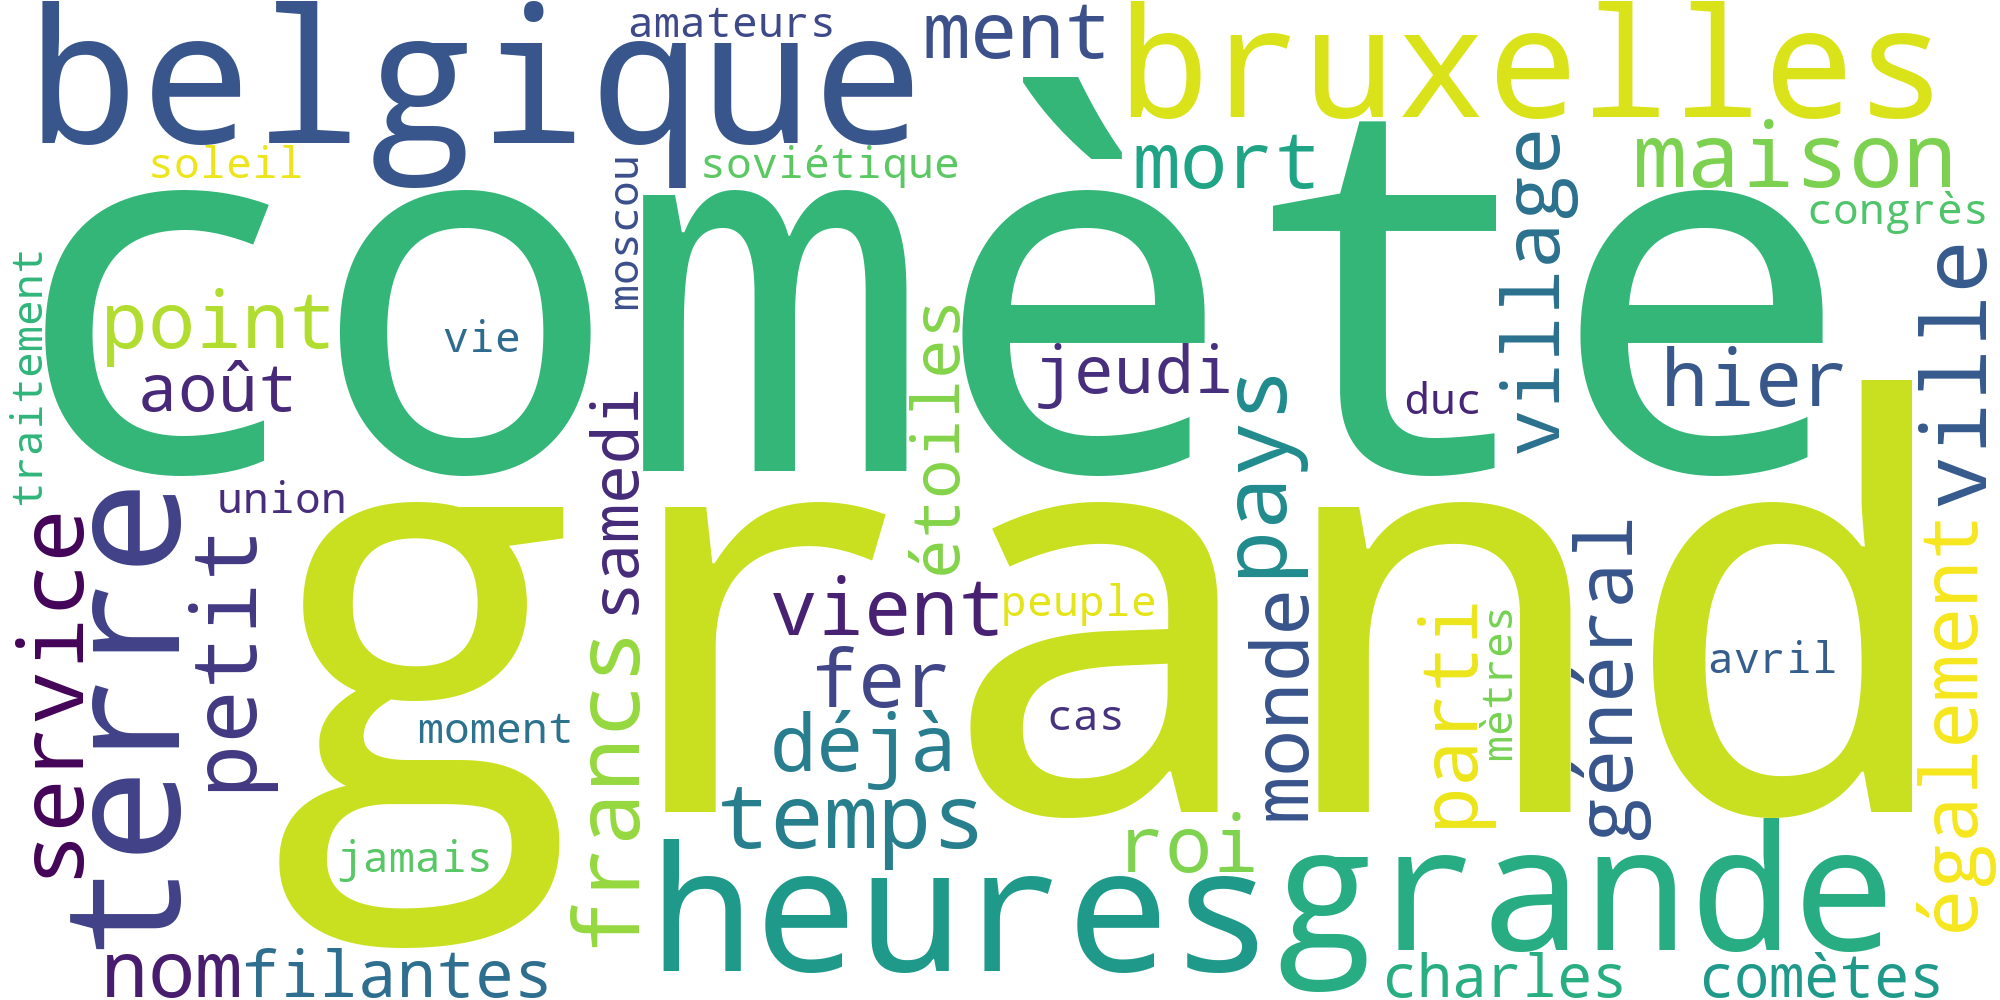

In [115]:
# Word cloud of top 50 keywords from all files
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image

# Flatten all keywords
all_keywords_flat = [kw for kws in all_token_keywords.values() for kw, score in kws]

# Count frequencies
keyword_freq = Counter(all_keywords_flat)
top_50 = dict(keyword_freq.most_common(50))

print(f"Top 50 keywords: {list(top_50.keys())}")

# Create and save word cloud
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(top_50)
cloud.to_file(os.path.join(temp_path, "halley_keywords_top50.png"))
Image(filename=os.path.join(temp_path, "halley_keywords_top50.png"))